In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Reading the data
data = pd.read_csv(r'D:/Temp_downloads/training_sample.csv/training_sample.csv')

In [11]:
data.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


In [12]:
data.shape

(455401, 25)

# So our dataset has 25 features and 455401 entries
# The unique identifier here is the userid
# We can clearly make out that Ordered is our target variable

# Let's check for datatypes and null values

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

# It's clear that except userid all other features are numerical!! Straightforward to model our data
# Also there are no null values observed

# Let's dig deeper into the type of data present in each feature

In [25]:
data.nunique()

UserID                     455401
basket_icon_click               2
basket_add_list                 2
basket_add_detail               2
sort_by                         2
image_picker                    2
account_page_click              2
promo_banner_click              2
detail_wishlist_add             2
list_size_dropdown              2
closed_minibasket_click         2
checked_delivery_detail         2
checked_returns_detail          2
sign_in                         2
saw_checkout                    2
saw_sizecharts                  2
saw_delivery                    2
saw_account_upgrade             2
saw_homepage                    2
device_mobile                   2
device_computer                 2
device_tablet                   2
returning_user                  2
loc_uk                          2
ordered                         2
dtype: int64

# It's very clear from the above table that except userid which has a unique identifier for each person all other features have only 2 unique entries in them 0 & 1

# Exploratory Data Analysis

# We can start of with a correlation map to see if there is any Multicollinearity among our features

In [28]:
cor = data.corr()
cor

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
basket_icon_click,1.000000,0.466671,0.529947,0.073016,0.082893,0.057253,0.109342,0.044153,0.291608,0.323940,...,0.008741,0.052922,0.030764,0.203087,0.016203,-0.001757,-0.006019,0.126640,0.018518,0.428334
basket_add_list,0.466671,1.000000,0.340968,0.106852,0.061462,0.028994,0.096608,0.019061,0.469625,0.208082,...,0.004161,0.030286,0.018150,0.180221,-0.017202,0.016629,0.015516,0.057443,0.018797,0.287666
basket_add_detail,0.529947,0.340968,1.000000,0.085854,0.124230,0.037502,0.109043,0.050724,0.247205,0.222444,...,0.008101,0.048410,0.024255,0.175138,-0.018800,0.032794,-0.001799,0.057680,0.030956,0.414420
sort_by,0.073016,0.106852,0.085854,1.000000,0.185661,-0.009754,0.058155,0.024056,0.124273,0.028453,...,0.006196,0.028102,0.012194,0.128205,-0.278043,0.269589,0.078088,0.010366,-0.051148,0.054636
image_picker,0.082893,0.061462,0.124230,0.185661,1.000000,-0.007182,0.046968,0.039412,0.074726,0.024515,...,0.005710,0.031267,0.008912,0.074698,-0.235542,0.241681,0.050471,0.002085,-0.041662,0.071492
account_page_click,0.057253,0.028994,0.037502,-0.009754,-0.007182,1.000000,0.014474,0.013251,0.016912,0.033595,...,0.008158,0.048095,0.026949,0.073538,0.038549,-0.025294,-0.017028,0.016550,-0.001389,0.057279
promo_banner_click,0.109342,0.096608,0.109043,0.058155,0.046968,0.014474,1.000000,0.031775,0.097991,0.056917,...,0.000998,0.024616,0.017825,0.073477,-0.032351,0.035099,0.007879,0.019168,-0.018817,0.056533
detail_wishlist_add,0.044153,0.019061,0.050724,0.024056,0.039412,0.013251,0.031775,1.000000,0.038497,0.030591,...,0.000713,0.013570,0.008133,0.033563,-0.009750,0.014493,0.002081,0.013149,-0.010889,0.023516
list_size_dropdown,0.291608,0.469625,0.247205,0.124273,0.074726,0.016912,0.097991,0.038497,1.000000,0.140700,...,0.001118,0.028138,0.015929,0.235547,-0.008991,-0.012537,0.036213,0.100140,-0.002313,0.154867
closed_minibasket_click,0.323940,0.208082,0.222444,0.028453,0.024515,0.033595,0.056917,0.030591,0.140700,1.000000,...,0.005080,0.021881,0.012418,0.077102,-0.000571,-0.028121,0.040407,0.052852,0.015351,0.140011


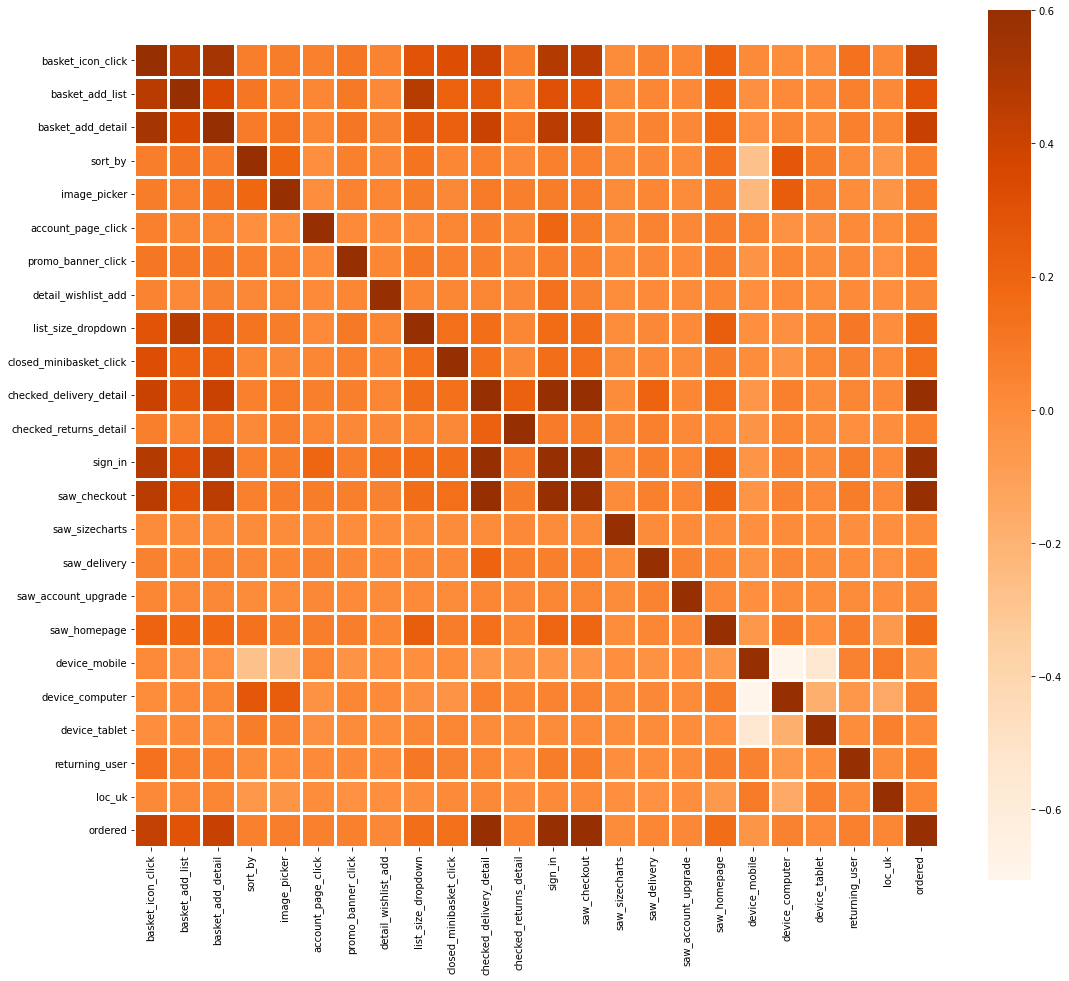

In [39]:
# HeatMap
plt.figure(figsize=(18, 16))
sns.heatmap(cor, vmax=0.6, center=0,
            square=True, linewidths=3, cmap='Oranges')
plt.show()

## Thoughts on the heatmap
 - 3 features basket_icon_click, basket_add_list, basket_add_detail are highly correlated among themselves. I would like to      give a combined name to them as basket_features
 - 3 more features checked_delivery_date, sign_in, saw_checkout are correlated to the basket_features.
 - There are two more features list_size_dropdown, closed_minibasket_click that are correlated to the basket features.
### Now let us look at the features that show very good correlation with our Target feature - Ordered
 - There are 6 featues that show very good correlation
1. basket_icon_click
2. basket_add_list
3. basket_add_detail
4. checked_delivery_detail
5. sign_in
6. saw_checkout

## Let's think for a minute and try to figure out intuitively if these strongly correlated features make sense
 - The 3 basket_features make sense because a person checks his basket before ordering the items
 - checked_delivery_detail also makes complete sense because only when a person is about to order will he look for delivery details.
 - sign-in makes sense as the person who wants to order and not just browse through the products would sign-in so that he can order from his account.
 - saw_checkout makes sense as a person who is about to buy would checkout.   

In [37]:
# We can also check the correlation table with just the target column
data.corr()['ordered']

basket_icon_click          0.428334
basket_add_list            0.287666
basket_add_detail          0.414420
sort_by                    0.054636
image_picker               0.071492
account_page_click         0.057279
promo_banner_click         0.056533
detail_wishlist_add        0.023516
list_size_dropdown         0.154867
closed_minibasket_click    0.140011
checked_delivery_detail    0.798720
checked_returns_detail     0.059484
sign_in                    0.665556
saw_checkout               0.708986
saw_sizecharts             0.007548
saw_delivery               0.031461
saw_account_upgrade        0.025857
saw_homepage               0.157778
device_mobile             -0.042907
device_computer            0.049208
device_tablet              0.016939
returning_user             0.060295
loc_uk                     0.031643
ordered                    1.000000
Name: ordered, dtype: float64

## Insights
 - The above table seems to reinforce our observations from heatmap
 - checked_delivery_detail seems to have a correlation of ~80% with the target feature

##  device_mobile seems to show a negative correlation with orders, this tells us that people are not buying from mobile device, so maybe the company can invest more to improve the User Interface of the mobile platform to it becomes more user-friendly and more customers start to buy from mobile platform as well.

# Model Building

### We have ordered as our target variable, so we can drop this feature, UserID is just a identifier and doesn't add any value to our model, so we can drop it.
###  mobile_device showed a strong negative correlation, so this actually means that this feature influences our target variable strongly but in a negative way, so we will keep this feature.


In [61]:
# explanatory variables
X = data.drop(['UserID', 'ordered',], axis=1)
# Target variable
y = data['ordered']

In [62]:
X.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,0,1,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,1


In [63]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: ordered, dtype: int64

In [64]:
# Splitting the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
print(f'X_train_shape: {X_train.shape}, X_test_shape : {X_test.shape}, y_train_shape: {y_train.shape}, y_test_shape{y_test.shape}')

X_train_shape: (364320, 23), X_test_shape : (91081, 23), y_train_shape: (364320,), y_test_shape(91081,)


In [66]:
# we start with a Naive Bayes Classifier for our model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [67]:
# Calculating the accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[86236,  1059],
       [   45,  3741]], dtype=int64)

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9878789209604638

# Now Test Data

In [69]:
# Reading the data
test_data = pd.read_csv(r'D:/Temp_downloads/testing_sample.csv/testing_sample.csv')

In [70]:
test_data.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,9d24-25k4-47889d24-25k4-494b-398124,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,7732-1k58-47887732-1k58-4475-679678,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,94k2-632j-471394k2-632j-4b4j-228160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,jdd8-419d-4714jdd8-419d-4198-674376,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,7473-7595-47147473-7595-4757-227547,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [71]:
test_data.shape

(151655, 25)

## The test data also has the same number of features and 151655 entries

## Let's check for datatypes and null values

In [72]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151655 entries, 0 to 151654
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   151655 non-null  object
 1   basket_icon_click        151655 non-null  int64 
 2   basket_add_list          151655 non-null  int64 
 3   basket_add_detail        151655 non-null  int64 
 4   sort_by                  151655 non-null  int64 
 5   image_picker             151655 non-null  int64 
 6   account_page_click       151655 non-null  int64 
 7   promo_banner_click       151655 non-null  int64 
 8   detail_wishlist_add      151655 non-null  int64 
 9   list_size_dropdown       151655 non-null  int64 
 10  closed_minibasket_click  151655 non-null  int64 
 11  checked_delivery_detail  151655 non-null  int64 
 12  checked_returns_detail   151655 non-null  int64 
 13  sign_in                  151655 non-null  int64 
 14  saw_checkout        

## There are no null values, so we don't have to worry about data imputation

In [ ]:
## Let's prepare the model for Test data

In [75]:
customer_id = test_data.UserID
test_X = test_data.drop(['ordered', 'UserID'], axis=1)
test_X.head()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


## Propensity - The literal meaning of this word is the tendency to behave in a particular way.
## In our model this term basically means what is the probability of inclination of the customer to buy(order) goods from our website

In [76]:
test_X['propensity_score'] = model.predict_proba(test_X)[:,1]

In [77]:
test_X

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,propensity_score
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0.0
151651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0.0
151652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0.0
151653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0.0


### Now let's add the UserID column back so we can identify the customers and their purchase behaviour/tendency which would help us to design a better customised promotional campaign in the comin days.

In [83]:
propensity_data = pd.concat([customer_id, test_X,], axis=1)

In [84]:
propensity_data

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,propensity_score
0,9d24-25k4-47889d24-25k4-494b-398124,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.0
1,7732-1k58-47887732-1k58-4475-679678,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.0
2,94k2-632j-471394k2-632j-4b4j-228160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.0
3,jdd8-419d-4714jdd8-419d-4198-674376,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.0
4,7473-7595-47147473-7595-4757-227547,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151650,d14b-520k-0j15d14b-520k-4kk2-660471,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0.0
151651,d427-5450-0j15d427-5450-4661-370635,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0.0
151652,8869-1022-0j168869-1022-4490-699568,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0.0
151653,5893-2228-0j165893-2228-4kb7-871348,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0.0


In [85]:
propensity_data.propensity_score.value_counts()

0.000000e+00    145191
1.000000e+00      1436
1.882515e-14       498
1.019412e-13       256
6.423586e-12       180
                 ...  
9.999461e-01         1
9.998580e-01         1
5.206726e-06         1
9.999999e-01         1
2.335036e-03         1
Name: propensity_score, Length: 714, dtype: int64

In [86]:
test_data.ordered.value_counts()

0    151655
Name: ordered, dtype: int64

### One of the major problem of this dataset is that majority of the customers fall into the not ordered category. Hence the dataset becomes imbalanced. So our predictions also tend to be biased. we need to look for other methods to balance the datset before training the model. We can also work with more models and check which one performs the best.